# Kernel density estimation(カーネル密度推定)
- なめらかなヒストグラムを作る
- データがある部分に対して正規分布を作って足し合わせる([図](https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png))
- カーネル関数を求めて足し合わせる

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
ds = randn(25)

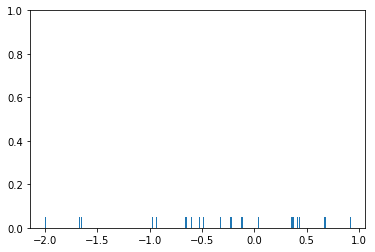

In [4]:
sns.rugplot(ds)

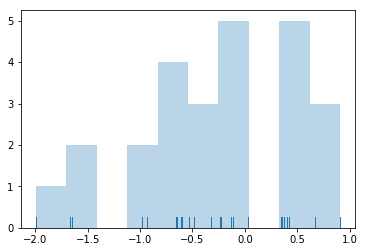

In [5]:
plt.hist(ds, alpha=0.3)
sns.rugplot(ds)

### カーネル密度推定グラフ作成

(0, 1)

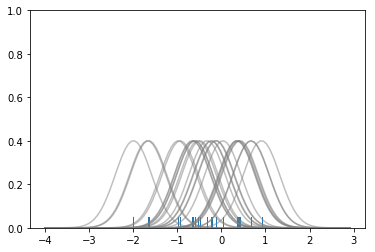

In [7]:
sns.rugplot(ds)

x_min = ds.min() - 2
x_max = ds.max() + 2
# 最小 -> 最大を100等分する軸を作る
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*ds.std()**5)/(3*len(ds)))**0.2

kernel_list = []
for dp in ds:
  kernel = stats.norm(dp, bandwidth).pdf(x_axis)
  kernel_list.append(kernel)
  
  kernel = kernel / kernel.max()
  kernel = kernel * 0.4
  plt.plot(x_axis, kernel, color='gray', alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basic Functions')

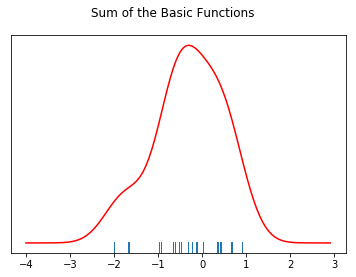

In [8]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='red')
sns.rugplot(ds)
plt.yticks([])
plt.suptitle('Sum of the Basic Functions')

### カーネル密度推定グラフ作成(Seaborn利用)

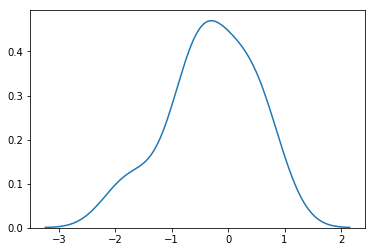

In [9]:
sns.kdeplot(ds)

### 補足

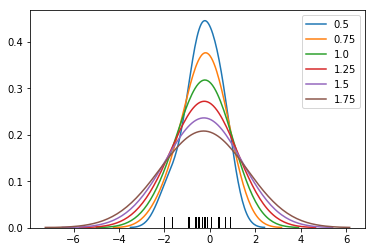

In [11]:
sns.rugplot(ds, color='black')
for bw in np.arange(0.5, 2, 0.25):
  sns.kdeplot(ds, bw=bw, label=bw)

- バンド幅は小さければとがる、大きければ広がる
- バンド幅
  - データポイントの影響がどこまで広がるか

#### 様々な密度関数

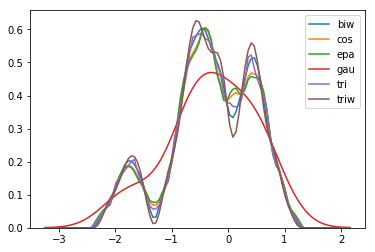

In [12]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
  sns.kdeplot(ds, kernel=kern, label=kern)

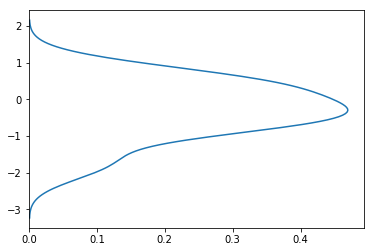

In [13]:
sns.kdeplot(ds, vertical=True)

## Cumulative distribution function(累積分布関数)
- ヒストグラムを積み上げていく

(array([ 1.,  3.,  3.,  5.,  9., 12., 17., 17., 22., 25.]),
 array([-1.99519933, -1.70468167, -1.414164  , -1.12364633, -0.83312866,
        -0.542611  , -0.25209333,  0.03842434,  0.328942  ,  0.61945967,
         0.90997734]),
 <a list of 10 Patch objects>)

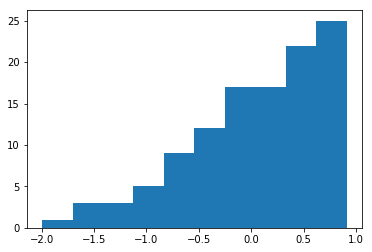

In [14]:
plt.hist(ds, cumulative=True)

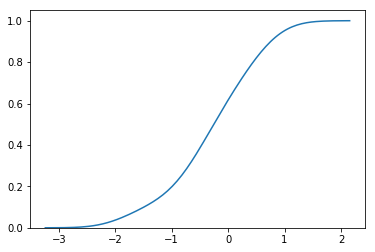

In [15]:
sns.kdeplot(ds, cumulative=True)

## 2次元に対する適用

In [17]:
mean = [0,0]
cov = [[1,0],[0,100]]
ds2 = np.random.multivariate_normal(mean, cov, 1000)

/Users/midori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


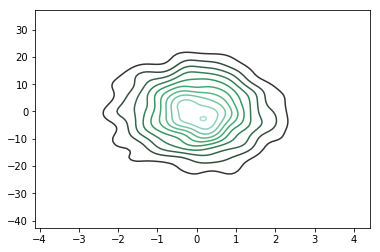

In [19]:
df = pd.DataFrame(ds2, columns=['X','Y'])
sns.kdeplot(df)

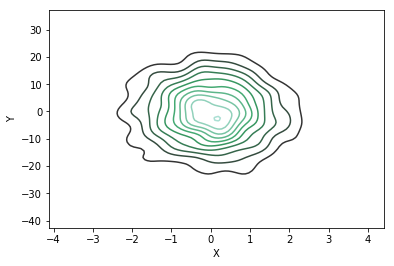

In [20]:
sns.kdeplot(df.X, df.Y)

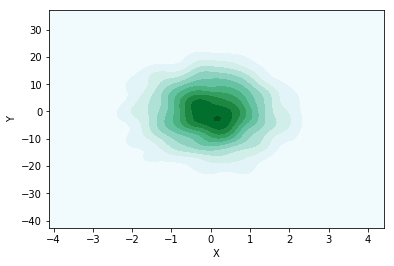

In [21]:
sns.kdeplot(df.X, df.Y, shade=True)

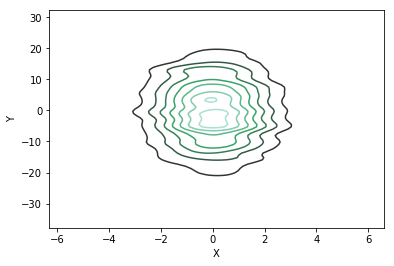

In [22]:
sns.kdeplot(df.X, df.Y, bw=1)

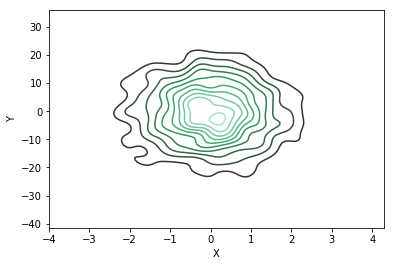

In [23]:
sns.kdeplot(df.X, df.Y, bw='silverman')

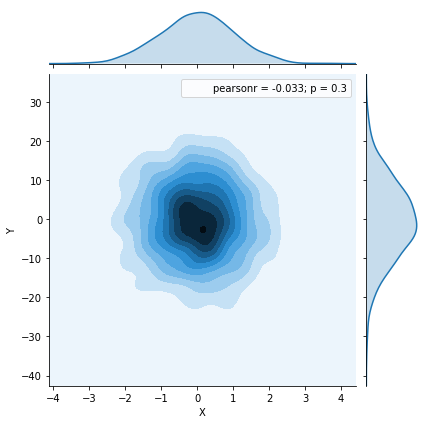

In [24]:
sns.jointplot('X','Y',df, kind='kde')